## Lesson 14.5 - Seaborn: Plotting with categorical data

*Facsimile of [Seaborn tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html).*

We :ref:`previously <regression_tutorial>` learned how to use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship, which we will discuss in this tutorial.

It's useful to divide seaborn's categorical plots into two groups: those that show the full distribution of observations within each level of the categorical variable, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The former includes the functions `stripplot`, `boxplot`, and `violinplot`, while the latter includes the functions `barplot`, `countplot`, and `pointplot`. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between `regplot` and `lmplot`, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level `factorplot`, which combines these functions with a `FacetGrid` to apply a categorical plot across a grid of figure panels.

It is easiest and best to invoke these functions with a DataFrame that is in `"tidy" <http://vita.had.co.nz/papers/tidy-data.pdf>`_ format, although the lower-level functions also accept wide-form DataFrames or simple vectors of observations. See below for examples.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "categorical")))

In [5]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## Distributions of observations within categories

The first set of functions shows the full distribution of the quantitative variable within each level of the categorical variable(s). These generalize some of the approaches we discussed in the :ref:`chapter <distribution_tutorial>` to the case where we want to quickly compare across several distributions.

### Categorical scatterplots

A simple way to show the distribution of some quantitative variable across the levels of a categorical variable uses `stripplot`, which generalizes a scatterplot to the case where one of the variables is categorical:

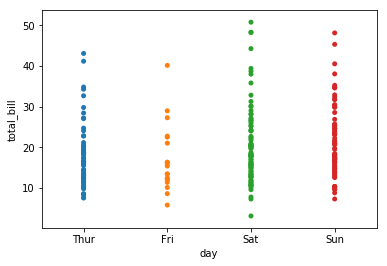

In [6]:
sns.stripplot(x="day", y="total_bill", data=tips)

It's also possible to add a nested categorical variable with the ``hue`` paramater. Above the color and position on the categorical axis are redundent, but now each provides information about one of the two variables:

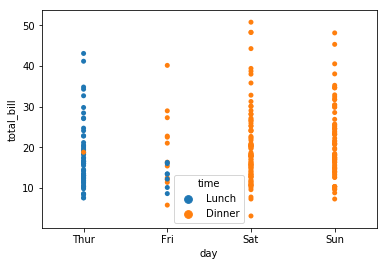

In [7]:
sns.stripplot(x="day", y="total_bill", hue="time", data=tips)

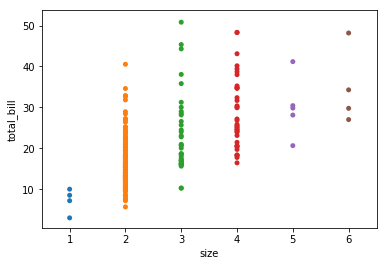

In [8]:
sns.stripplot(x="size", y="total_bill", data=tips.sort_values("size"))

With these plots, it's often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories):

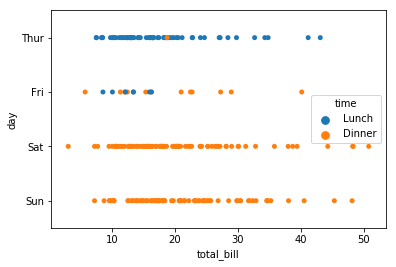

In [9]:
sns.stripplot(x="total_bill", y="day", hue="time", data=tips)

### Boxplots

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels.

The first is the familiar `boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

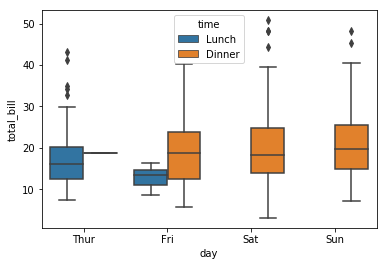

In [10]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### Violinplots

A different approach is a `violinplot`, which combines a boxplot with the kernel density estimation procedure described in the :ref:`distributions tutorial <distribution_tutorial>`_:

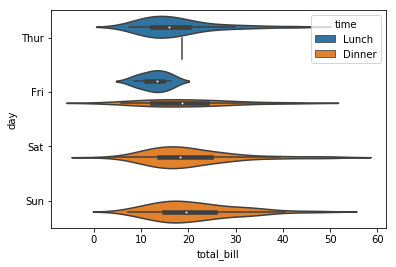

In [11]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

This approach uses the kernel density estimate to provide a better description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

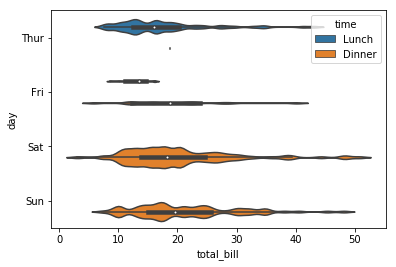

In [12]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False)

It's also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

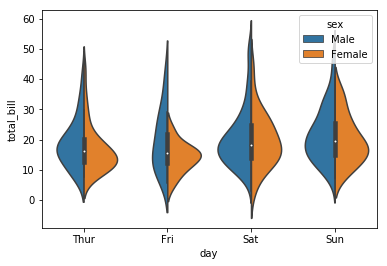

In [13]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

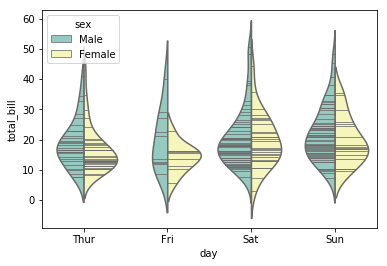

In [14]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3")

It can also be useful to combine `stripplot` with `violinplot` or `boxplot` to show each observation along with a summary of the distribution:

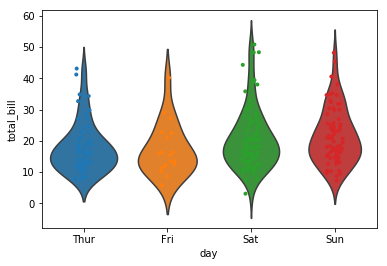

In [15]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, size=4)

## Statistical estimation within categories

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the `barplot` function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

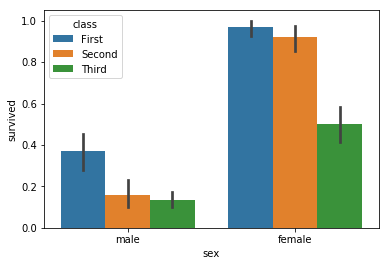

In [16]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the `countplot` function:

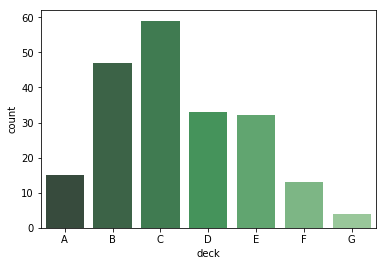

In [17]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")

Both `barplot` and `countplot` can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

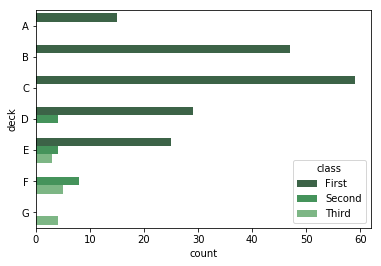

In [18]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d")

### Point plots

An alternative style for visualizing the same information is offered by the `pointplot` function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same ``hue`` category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

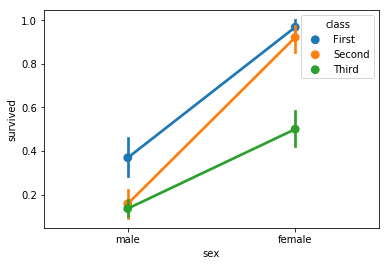

In [19]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the ``hue`` category:

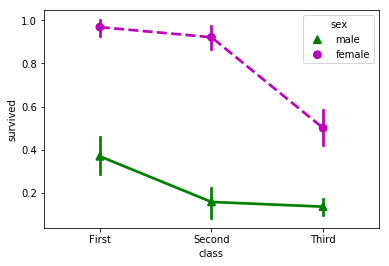

In [20]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

Drawing multi-panel categorical plots
-------------------------------------

As we mentioned above, there are two ways to draw categorical plots in seaborn. Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function `factorplot`, which combines these functions with a `FacetGrid` to add the ability to examine additional categories through the larger structure of the figure.

While the main options for each plot kind are available either way, the lower-level functions have a bit more flexibility in the kind of inputs they can take. For instance, you can just pass a ``DataFrame`` to the ``data`` parameter, and the distribution or central tendency of each *column* in the dataframe will be shown:

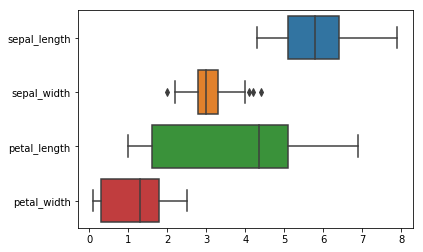

In [21]:
sns.boxplot(data=iris, orient="h")

Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a ``DataFrame``:

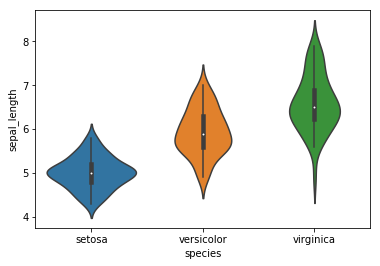

In [22]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots:

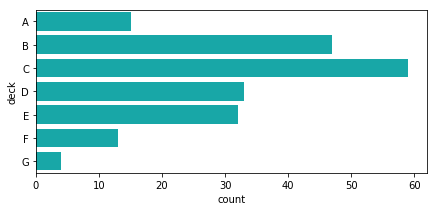

In [23]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c")

The `factorplot` function is a higher-level wrapper on these plots that produces a matplotlib figure managed through a `FacetGrid`:

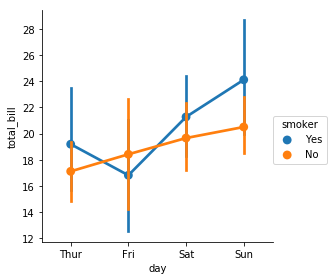

In [24]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips)

By default it uses `pairplot`, but the ``kind`` parameter lets you chose any of the kinds of plots discussed above:

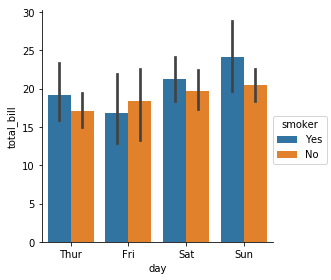

In [25]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

The key advantage of `factorplot` is that it's easy to add faceting by additional variables in the ``DataFrame``, such as along the columns:

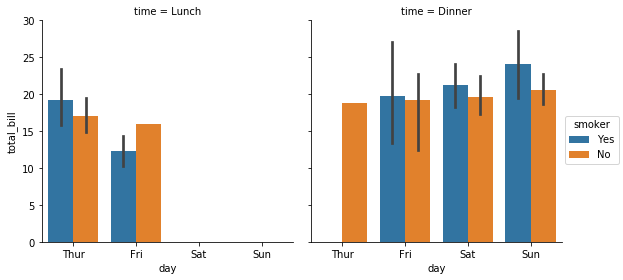

In [26]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="bar")

Any kind of plot can be drawn. Because of the way `FacetGrid` works, to change the size and shape of the figure you need to specify the ``size`` and ``aspect`` arguments, which apply to a single facet:

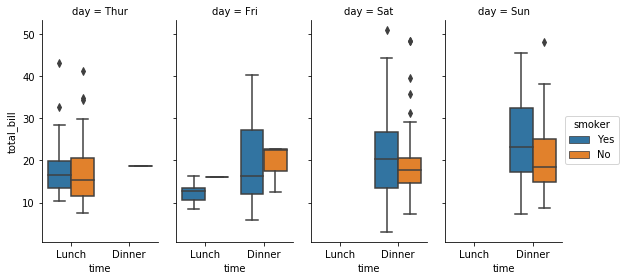

In [27]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a `PairGrid` to show categorical relationships across several different variables:

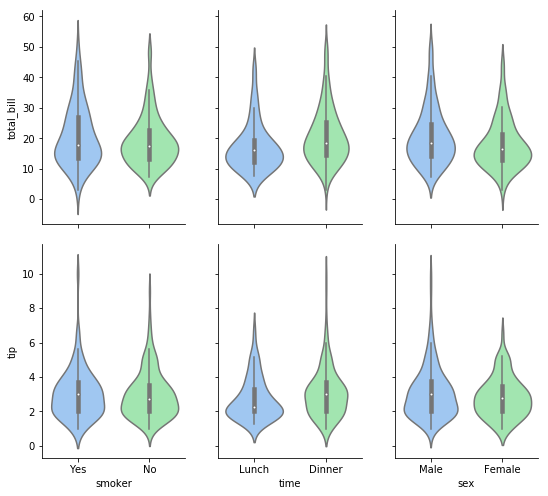

In [28]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel")